In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from sklearn.metrics import confusion_matrix

In [28]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [29]:
df = df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.drop(columns = 'customerID',inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)
df['Churn'].replace('Yes',1,inplace=True)
df['Churn'].replace('No',0,inplace=True)
print(df['Churn'].unique())
df['Churn'] = df['Churn'].astype('int')
print(df.info())

[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   ob

In [32]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928,0.265370
std,24.559481,30.090047,2265.270398,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,402.225000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [34]:
df = pd.get_dummies(df,dtype=int)

In [35]:
print(df.head())

   tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  gender_Male   
0       1           29.85         29.85      0              1            0  \
1      34           56.95       1889.50      0              0            1   
2       2           53.85        108.15      1              0            1   
3      45           42.30       1840.75      0              0            1   
4       2           70.70        151.65      1              1            0   

   SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  ...   
0                1                0           0            1  ...  \
1                1                0           1            0  ...   
2                1                0           1            0  ...   
3                1                0           1            0  ...   
4                1                0           1            0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year   
0                    0                        

In [36]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import cross_val_score

In [37]:
class ChurnData(Dataset):
    def __init__(self,csv):
        self.label = csv['Churn'].to_numpy()
        self.data = csv.drop(columns=['Churn']).to_numpy()

    def __len__(self):
        return len(self.label)


    def __getitem__(self,idx):
        data = self.data[idx]
        label = self.label[idx]

        data = torch.tensor(data)
        label = torch.tensor(label)
        return data,label

In [38]:
data = ChurnData(df)
print(data[1])

(tensor([3.4000e+01, 5.6950e+01, 1.8895e+03, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00], dtype=torch.float64), tensor(0, dtype=torch.int32))


In [39]:
kfold = KFold(n_splits = 5,shuffle=True)

In [40]:
class MLPReg(nn.Module):
    def __init__(self,dim=512):
        super(MLPReg,self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(len(data[0][0]),dim),

            nn.ReLU(),
            nn.Linear(dim,dim),
            nn.ReLU(),
            nn.Linear(dim,2)
        )

    def forward(self,x):
        return self.layer(x)

In [41]:
net = MLPReg()

In [42]:
def acct(pred,label):
    p = torch.argmax(pred,1).detach().numpy()
    label = label.detach().numpy()

    res = np.where(p==label)

    return len(res[0])/len(label)

In [43]:
def val(test_loader):
    net.eval()
    rv = 0
    for i,(data,label) in enumerate(test_loader):
        pred = net(data.float())
        rv+= acct(pred,label)

    return rv/i


In [44]:
def train(train_loader,test_loader):
    net.train()
    lm,am,vm =[],[],[]
    l_r = 0.001
    cri = nn.CrossEntropyLoss()

    opt = torch.optim.SGD(net.parameters(),lr = 0.001)
    for e in range(1,31):
        rl,ra = 0,0
        if e%5 == 0:
            l_r= l_r*0.75
        opt = torch.optim.SGD(net.parameters(),lr=l_r)
        for i,(data,label) in enumerate(train_loader):
            opt.zero_grad()
            pred = net(data.float())
            loss = cri(pred,label.long())
            print(loss)
            rl+=loss.item()
            ra+=acct(pred,label.long())
            loss.backward()
            opt.step()
        print(rl,ra)
        lm.append(rl/i) 
        am.append(ra/i)
        vm.append(val(test_loader))

    return lm,am,vm

In [45]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
l,a,v = [],[],[]
for fold,(train_ids,test_ids) in enumerate(kfold.split(data)):

    train_set = SubsetRandomSampler(train_ids)
    test_set = SubsetRandomSampler(test_ids)
    train_loader = DataLoader(data,batch_size=64,sampler=train_set)
    test_loader = DataLoader(data,batch_size=64,sampler=test_set)
    l_t,a_t,v_t = train(train_loader,test_loader)
    l.append(l_t)
    a.append(a_t)
    v.append(v_t)

tensor(34.7699, grad_fn=<NllLossBackward0>)
tensor(1179.4275, grad_fn=<NllLossBackward0>)
tensor(121.6830, grad_fn=<NllLossBackward0>)
tensor(152.0466, grad_fn=<NllLossBackward0>)
tensor(13.6508, grad_fn=<NllLossBackward0>)
tensor(13.4682, grad_fn=<NllLossBackward0>)
tensor(49.7420, grad_fn=<NllLossBackward0>)
tensor(23.7523, grad_fn=<NllLossBackward0>)
tensor(6.2367, grad_fn=<NllLossBackward0>)
tensor(1.7249, grad_fn=<NllLossBackward0>)
tensor(1.4579, grad_fn=<NllLossBackward0>)
tensor(1.3899, grad_fn=<NllLossBackward0>)
tensor(5.3852, grad_fn=<NllLossBackward0>)
tensor(9.6263, grad_fn=<NllLossBackward0>)
tensor(3.3692, grad_fn=<NllLossBackward0>)
tensor(0.9967, grad_fn=<NllLossBackward0>)
tensor(1.4379, grad_fn=<NllLossBackward0>)
tensor(0.5654, grad_fn=<NllLossBackward0>)
tensor(1.2528, grad_fn=<NllLossBackward0>)
tensor(0.6503, grad_fn=<NllLossBackward0>)
tensor(0.8614, grad_fn=<NllLossBackward0>)
tensor(1.0416, grad_fn=<NllLossBackward0>)
tensor(0.9150, grad_fn=<NllLossBackward0>)

In [51]:
def flat(arr):
    res = []
    for i in arr:
        temp =0
        for x in i:
            temp+=x

        res.append(temp/30)
    
    return res

0.6491225826721921


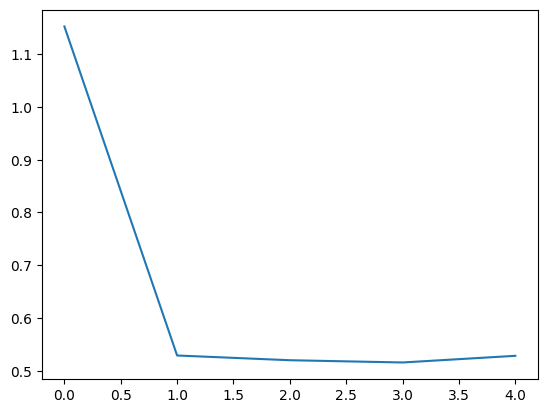

In [55]:
l_res = flat(l)
plt.plot(l_res)
print(sum(l_res)/len(l_res))

0.7875074968434344


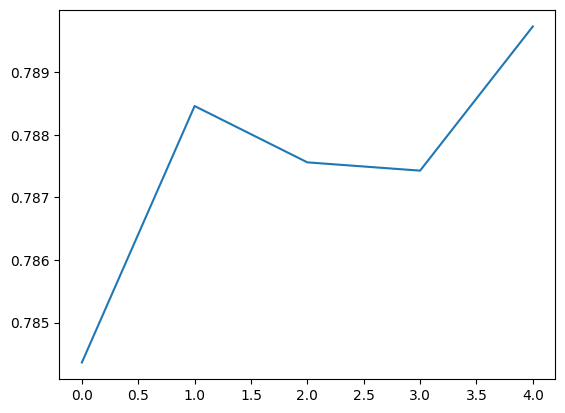

In [54]:
a_res = flat(a)
plt.plot(a_res)
print(sum(a_res)/len(a_res))

0.7877910804473306


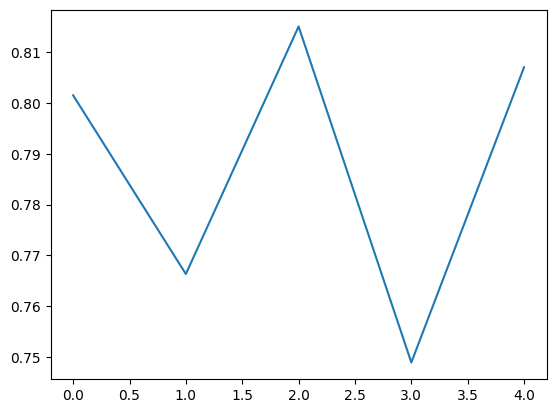

In [56]:
v_res = flat(v)
plt.plot(v_res)
print(sum(v_res)/len(v_res))

In [58]:
train_x,test_x,train_y,test_y = train_test_split(df.drop(columns=['Churn']),df['Churn'],test_size=0.2,random_state=42)

In [61]:
lr = LogisticRegression(max_iter=200)
scores = cross_val_score(lr,test_x,test_y,cv=5)
print(sum(scores)/5)

0.8083793947654021


In [62]:
rf = RandomForestClassifier(n_estimators=1000)
scores = cross_val_score(rf,test_x,test_y,cv=5)
print(sum(scores)/5)

0.7806996289846294


In [70]:
from sklearn.metrics import f1_score
import seaborn as sns


In [79]:
def plot(cf):
    
    ax = sns.heatmap(cf,annot=True,fmt = 'd')
    ax.set_xlabel('Predicted')
    ax.xaxis.set_ticklabels(['Negative','Positive'])

    ax.set_ylabel('Actual')
    ax.yaxis.set_ticklabels(['Negative','Positive'])

0.6364922206506365


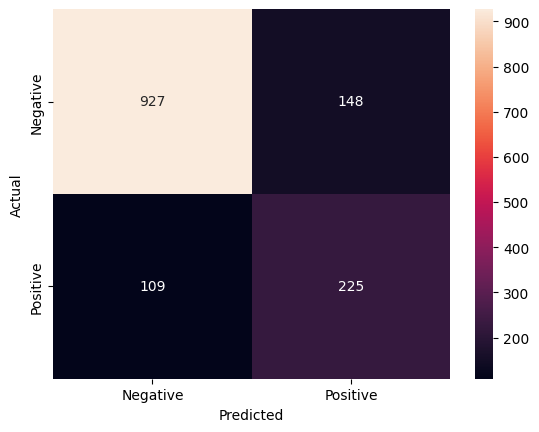

In [83]:
lr_res = lr.fit(train_x,train_y)
pred = lr_res.predict(test_x)
print(f1_score(pred,test_y))
cf_lr = confusion_matrix(pred,test_y)
plot(cf_lr)

0.5431711145996859


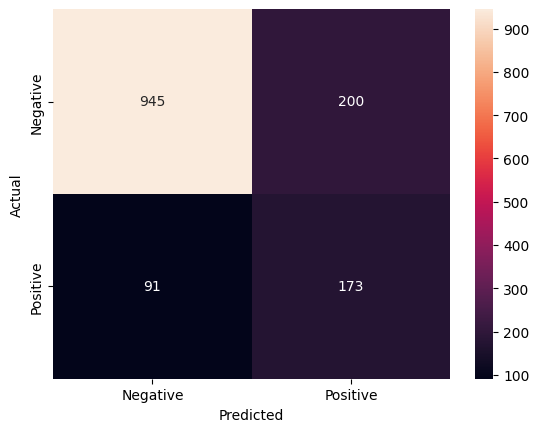

In [86]:
rf_res = rf.fit(train_x,train_y)
pred = rf_res.predict(test_x)
print(f1_score(pred,test_y))
cf_rf = confusion_matrix(pred,test_y)
plot(cf_rf)

0.5469387755102042


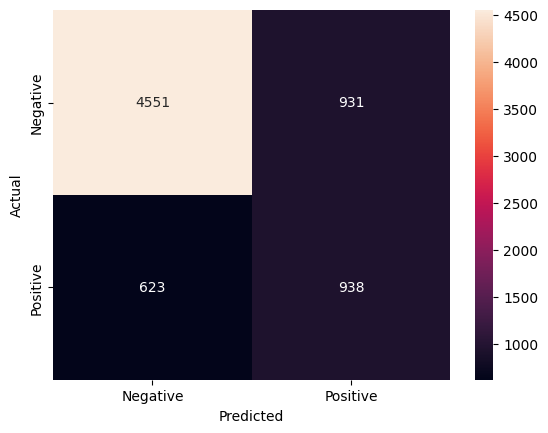

In [101]:
x = torch.tensor(df.drop(columns=['Churn']).to_numpy()).float()
y = torch.tensor(df['Churn'].to_numpy())
pred = torch.argmax(net(x),1)
print(f1_score(pred,y))
res = confusion_matrix(pred,y)
plot(res)


In [105]:
print(len(df[df['Churn']==0])/len(df))
print(len(df[df['Churn']==1])/len(df))

0.7346301292063041
0.2653698707936959
